In [36]:
import math
import matplotlib.pyplot as plt

# Planetary gravities (m/s^2)
planetary_gravity = {
    "Mercury": 3.7,
    "Venus": 8.87,
    "Earth": 9.81,
    "Mars": 3.71,
    "Jupiter": 24.79,
    "Saturn": 10.44,
    "Uranus": 8.69,
    "Neptune": 11.15,
    "Pluto": 0.62,
}

# Simulation constants
v0 = 0  # Initial velocity (m/s)
y0 = 100  # Initial height (m)
dt = 0.01  # Time step (s)
coin_radius = 15
vertical_margin = 100  # Distance from the top of the screen

# Function to calculate the fall time and final velocity
def calculate_fall_time_and_velocity(g):
    fall_time = math.sqrt(2 * y0 / g)  # Time to fall from height y0
    final_velocity = math.sqrt(2 * g * y0)  # Final velocity using v = sqrt(2gh)
    return fall_time, final_velocity


In [39]:
import pygame
import math

# Initialize Pygame
pygame.init()

# Screen dimensions
WIDTH, HEIGHT = 1270, 720
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Coin Drop Simulation for Planets")

# Colors
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
GOLD = (255, 215, 0)
GRAY = (200, 200, 200)
BLUE = (0, 128, 255)

# Height buttons
height_buttons = [
    {"text": "Height: 50m", "x": 100, "y": HEIGHT - 60, "height": 50},
    {"text": "Height: 80m", "x": 350, "y": HEIGHT - 60, "height": 80},
    {"text": "Height: 100m", "x": 600, "y": HEIGHT - 60, "height": 100},
]

# Function to reset the simulation
def reset_simulation():
    coins = []
    for i, (planet, gravity) in enumerate(planetary_gravity.items()):
        fall_time, final_velocity = calculate_fall_time_and_velocity(gravity)

        # Scaling factor ensures the objects fall visibly within the screen
        scaling_factor = (HEIGHT - 2 * vertical_margin) / y0

        coins.append({
            "planet": planet,
            "x": 100 + i * 130,  # Horizontally spaced coins
            "y": vertical_margin,  # Starting near the top of the screen
            "v": v0,
            "g": gravity,
            "falling": True,
            "fall_time": 0,  # Simulation-based fall time
            "true_fall_time": fall_time,  # Pre-calculated true fall time
            "scaling_factor": scaling_factor,  # Dynamically calculated scaling
        })
    return coins

# Initialize coin data

# Button properties
button_width = 200
button_height = 40
button_x = (WIDTH - button_width) // 2
button_y = 20  # Move the button to the top (20 pixels from the top edge)

# Font for labels
font = pygame.font.SysFont(None, 24)

# Load coin image and resize
coin_image = pygame.image.load('20piso.png')  # Load your coin image
original_width, original_height = coin_image.get_size()

# Resize the coin image while maintaining aspect ratio
new_width = 30  # Set the desired width
new_height = int(original_height * (new_width / original_width))  # Maintain the aspect ratio
coin_image = pygame.transform.scale(coin_image, (new_width, new_height))

# Initialize coin data
coins = reset_simulation()

# Main simulation loop
running = True
clock = pygame.time.Clock()

while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

        elif event.type == pygame.MOUSEBUTTONDOWN:
            # Check if height button is clicked
            mouse_x, mouse_y = event.pos
            for button in height_buttons:
                if button["x"] <= mouse_x <= button["x"] + button_width and button["y"] <= mouse_y <= button["y"] + button_height:
                    y0 = button["height"]
                    coins = reset_simulation()  # Reset simulation with new height

            # Check if the restart button is clicked
            if button_x <= mouse_x <= button_x + button_width and button_y <= mouse_y <= button_y + button_height:
                coins = reset_simulation()  # Restart the simulation

    screen.fill(BLACK)

    # Update coin positions and draw them
    for coin in coins:
        if coin["falling"]:
            coin["fall_time"] += dt
            coin["v"] = min(coin["v"] + coin["g"] * dt, math.sqrt(2 * coin["g"] * y0))
            coin["y"] += coin["v"] * dt * coin["scaling_factor"]
            if coin["fall_time"] >= coin["true_fall_time"]:
                coin["falling"] = False
                coin["fall_time"] = coin["true_fall_time"]  # Ensure displayed time matches calculated value
                coin["v"] = math.sqrt(2 * coin["g"] * y0)  # Cap velocity to true final velocity

        # Display planet info
        label_text = f"{coin['planet']} T: {coin['fall_time']:.2f}s"
        label = font.render(label_text, True, WHITE)
        screen.blit(label, (coin["x"] - new_width // 2, coin["y"] + new_height // 2 - 50))

        velocity_text = f"V: {coin['v']:.2f} m/s"
        velocity_label = font.render(velocity_text, True, WHITE)
        screen.blit(velocity_label, (coin["x"] - new_width // 2, coin["y"] + new_height // 2 - 80))

        screen.blit(coin_image, (coin["x"] - new_width // 2, coin["y"] - new_height // 2))

    # Draw height buttons
    for button in height_buttons:
        pygame.draw.rect(screen, BLUE, (button["x"], button["y"], button_width, button_height))
        button_label = font.render(button["text"], True, WHITE)
        screen.blit(button_label, (button["x"] + 20, button["y"] + 10))

    # Draw the restart button
    pygame.draw.rect(screen, GRAY, (button_x, button_y, button_width, button_height))
    button_text = font.render("Restart Simulation", True, BLACK)
    screen.blit(button_text, (button_x + 20, button_y + 10))

    # Update display
    pygame.display.flip()
    clock.tick(60)

# Function to simulate and print results for different heights
def simulate_and_print_results():
    heights = [50, 80, 100]  # Heights to simulate
    results = {}  # Store results for each height
    
    for height in heights:
        global y0
        y0 = height  # Set the initial height
        coins = reset_simulation()  # Reset simulation with the specified height
        
        # Sort coins based on fall time
        coins_sorted = sorted(coins, key=lambda x: x['true_fall_time'])
        results[height] = coins_sorted  # Store the sorted coins for the height

    # Print tables for each height
    for height, coins in results.items():
        print(f"\nResults for Height: {height}m")
        print(f"{'Planet':<12}{'V0 (m/s)':<12}{'G (m/s²)':<12}{'t (s)':<12}{'Vf (m/s)'}")
        for coin in coins:
            print(f"{coin['planet']:<12}{v0:<12}{coin['g']:<12}{coin['true_fall_time']:<12.2f}{math.sqrt(2 * coin['g'] * height):<12.2f}")

simulate_and_print_results()

pygame.quit()



Results for Height: 50m
Planet      V0 (m/s)    G (m/s²)    t (s)       Vf (m/s)
Jupiter     0           24.79       2.01        49.79       
Neptune     0           11.15       2.99        33.39       
Saturn      0           10.44       3.09        32.31       
Earth       0           9.81        3.19        31.32       
Venus       0           8.87        3.36        29.78       
Uranus      0           8.69        3.39        29.48       
Mars        0           3.71        5.19        19.26       
Mercury     0           3.7         5.20        19.24       
Pluto       0           0.62        12.70       7.87        

Results for Height: 80m
Planet      V0 (m/s)    G (m/s²)    t (s)       Vf (m/s)
Jupiter     0           24.79       2.54        62.98       
Neptune     0           11.15       3.79        42.24       
Saturn      0           10.44       3.91        40.87       
Earth       0           9.81        4.04        39.62       
Venus       0           8.87        4.25   

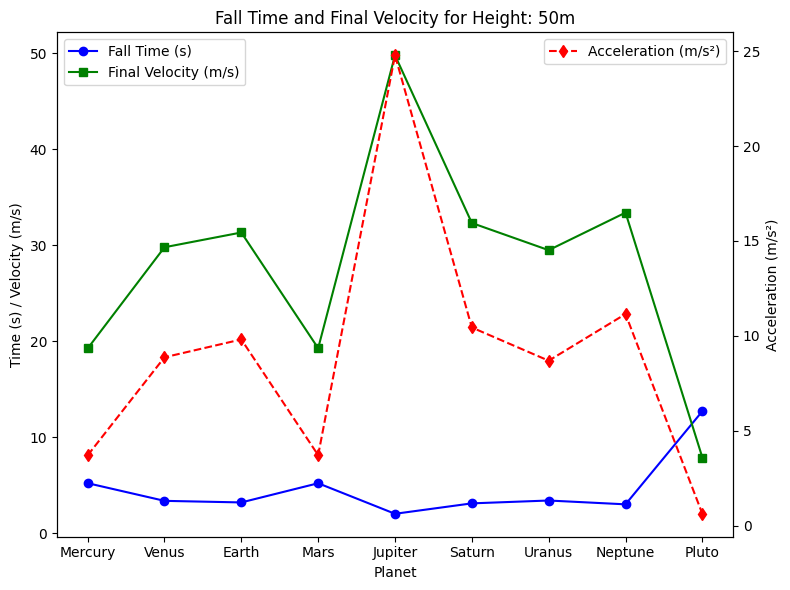

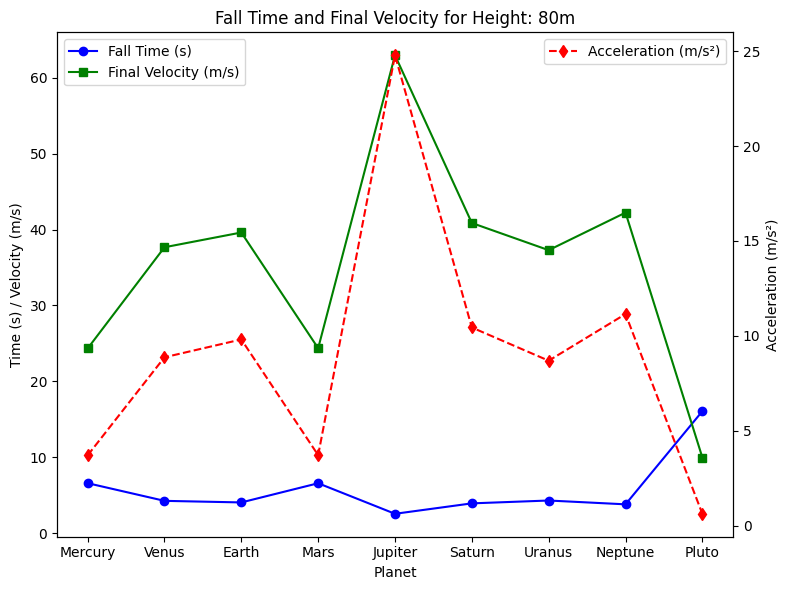

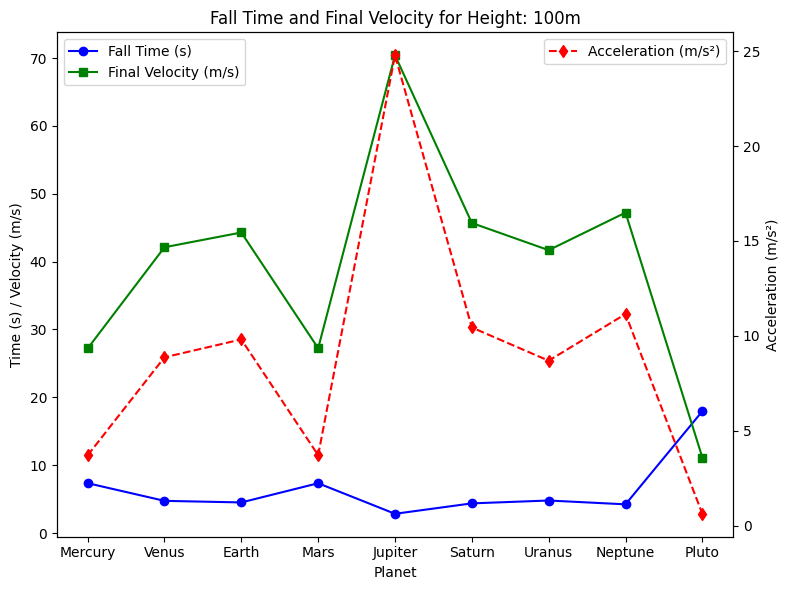

In [38]:
# Function to simulate and plot results for different heights
def simulate_and_plot_results():
    heights = [50, 80, 100]  # Heights to simulate

    # Simulate results for each height and store the fall times and velocities
    for height in heights:
        global y0
        y0 = height  # Set the initial height
        coins = reset_simulation()  # Reset simulation with the specified height

        # Prepare data for plotting
        fall_times = []
        final_velocities = []
        accelerations = []
        planets = []

        for coin in coins:
            fall_times.append(coin['true_fall_time'])
            final_velocities.append(math.sqrt(2 * coin['g'] * height))  # Calculate final velocity
            accelerations.append(coin['g'])  # The acceleration is the gravitational pull for each planet
            planets.append(coin['planet'])

        # Create line plots for each height
        fig, ax1 = plt.subplots(figsize=(8, 6))

        # Plot for Fall Time and Final Velocity
        ax1.plot(planets, fall_times, marker='o', color='blue', label="Fall Time (s)")
        ax1.plot(planets, final_velocities, marker='s', color='green', label="Final Velocity (m/s)")
        ax1.set_xlabel("Planet")
        ax1.set_ylabel("Time (s) / Velocity (m/s)")
        ax1.set_title(f"Fall Time and Final Velocity for Height: {height}m")
        ax1.set_xticks(range(len(planets)))
        ax1.set_xticklabels(planets)

        # Create a second y-axis for the acceleration
        ax2 = ax1.twinx()
        ax2.plot(planets, accelerations, marker='d', color='red', label="Acceleration (m/s²)", linestyle='--')
        ax2.set_ylabel("Acceleration (m/s²)")

        # Display both plots for the current height
        ax1.legend(loc='upper left')
        ax2.legend(loc='upper right')
        plt.tight_layout()
        plt.show()

# Run the plotting function
simulate_and_plot_results()
